In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("spam.csv")

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 606-607: invalid continuation byte

```
What & Why?:

1. UnicodeDecodeError happens when Python can’t convert file bytes into text because the encoding is mismatched.

2. By default, Pandas assumes UTF-8, but many files use latin1, cp1252, or ISO-8859-1.

3. When byte patterns don’t fit UTF-8 rules, Python raises the error.

4. It’s like reading a Telugu book with English grammar rules — characters won’t make sense.

5. ✅ Fix: specify the correct encoding (encoding="latin1" etc.) or auto-detect with tools like chardet.
```

In [3]:
df = pd.read_csv("spam.csv", encoding="latin1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [ ]:
# (1) data cleaning
# (2) EDA
# (3) Text Preprocessing
# (4) Modelling
# (5) Evaluation
# (6) Improvements
# (7) website
# (8) Deploy

## 1. Data cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# drop last three columns

df.drop(columns = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace = True)

In [7]:
# rename the cols

df.rename(columns = {"v1": "target", "v2": "text"}, inplace = True)
df.sample(5)

,target,text
2179,ham,And popping &lt;#&gt; ibuprofens was no help.
4613,ham,hows my favourite person today? r u workin har...
2745,ham,R Ì_ going 4 today's meeting?
3545,ham,SO IS TH GOWER MATE WHICH IS WHERE I AM!?! HOW...
5459,ham,If you hear a loud scream in about &lt;#&gt; m...


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [9]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [11]:
# check for duplicate values
df.duplicated().sum()

403

In [12]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [13]:
df.duplicated().sum()

0

In [14]:
df.shape

(5169, 2)

In [15]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

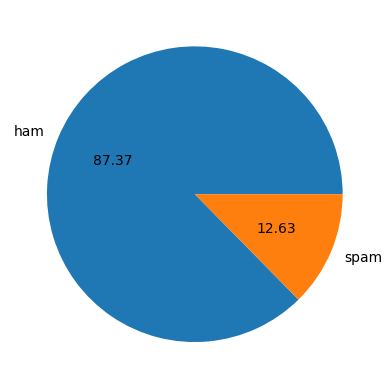

In [16]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct = '%0.2f')
plt.show()

In [17]:
# Data is imbalanced

In [18]:
import nltk

In [19]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [20]:
df['num_characters'] = df['text'].apply(len)

In [21]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
# number of words
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [23]:
# number of sentences
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [24]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
# ham

df[(df['target'] == 0)][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
# spam

df[(df['target'] == 1)][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [27]:
import seaborn as sns

C:\Users\ANANTH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ANANTH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

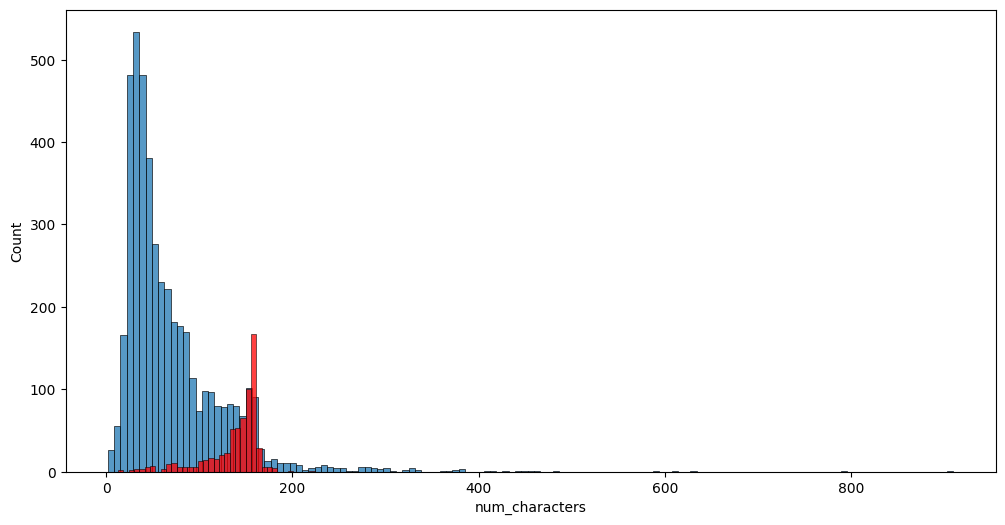

In [28]:
plt.figure(figsize = (12, 6))
sns.histplot(df[(df['target'] == 0)]['num_characters'])
sns.histplot(df[(df['target'] == 1)]['num_characters'], color = 'red')

C:\Users\ANANTH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ANANTH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

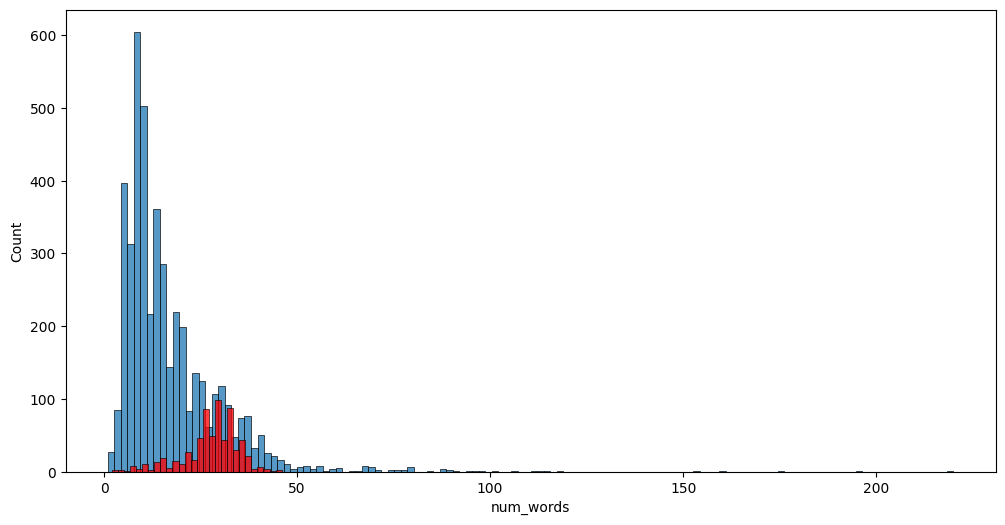

In [29]:
plt.figure(figsize = (12, 6))
sns.histplot(df[(df['target'] == 0)]['num_words'])
sns.histplot(df[(df['target'] == 1)]['num_words'], color = 'red')

C:\Users\ANANTH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ANANTH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ANANTH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


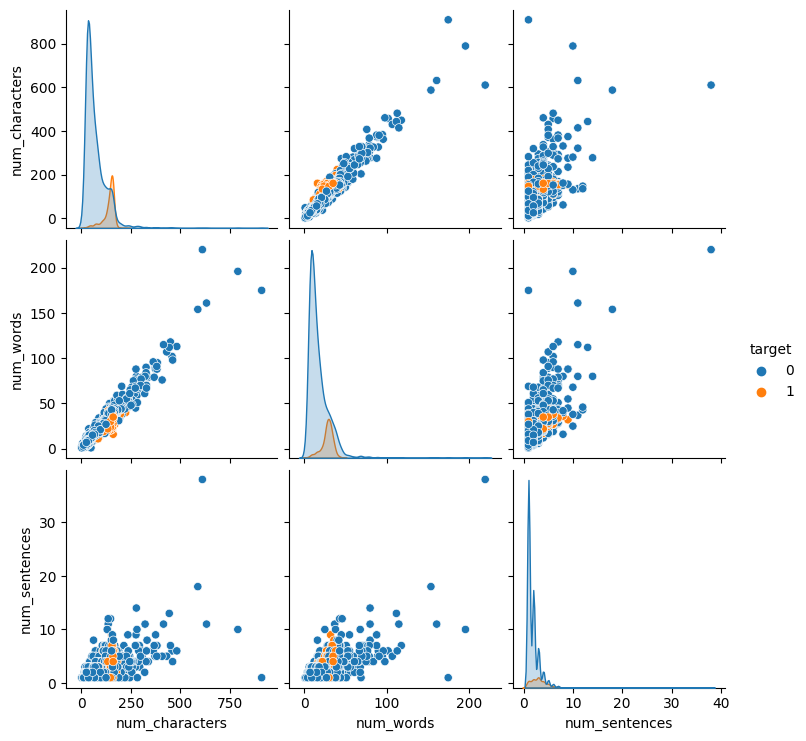

In [30]:
sns.pairplot(df, hue = 'target')
plt.show()

In [31]:
df.drop(['text'], axis = 1).corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

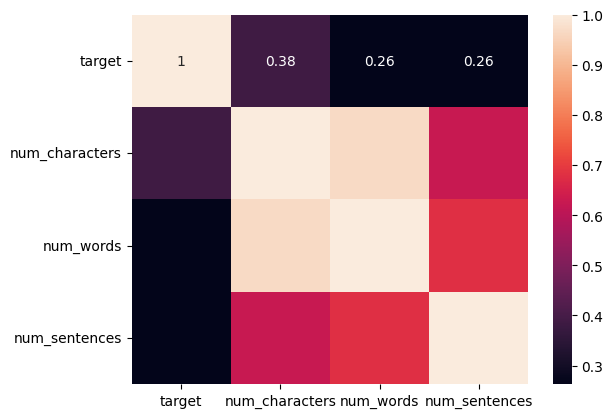

In [32]:
sns.heatmap(df.drop(['text'], axis = 1).corr(), annot = True)

In [ ]:
# 3. Text Preprocessing
# Lower case
# Tokenization
# Removing special characters
# Removing stop words and punctuations
# Stemming

In [33]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [34]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [35]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer() 
ps.stem("dancing")

'danc'

In [36]:
ps.stem('loving')

'love'

In [37]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:] 
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:] 
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [38]:
transform_text("I Loved the YT Lectures on Machine Learning?")

'love yt lectur machin learn'

In [39]:
df['transformed_text'] = df['text'].apply(transform_text)

In [40]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


```
from wordcloud import WordCloud
wc = WordCloud(width = 50, height = 50, min_font_size = 10, background_color = 'white')

---------------------------------------------------------------------------
ModuleNotFoundError                       Traceback (most recent call last)
Cell In[41], line 1
----> 1 from wordcloud import WordCloud
      2 wc = WordCloud(width = 50, height = 50, min_font_size = 10, background_color = 'white')

ModuleNotFoundError: No module named 'wordcloud'
```

<hr>

```
!pip install wordcloud

Collecting wordcloud
  Downloading wordcloud-1.9.4-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
Requirement already satisfied: numpy>=1.6.1 in c:\users\ananth\anaconda3\lib\site-packages (from wordcloud) (1.26.4)
Requirement already satisfied: pillow in c:\users\ananth\anaconda3\lib\site-packages (from wordcloud) (10.2.0)
Requirement already satisfied: matplotlib in c:\users\ananth\anaconda3\lib\site-packages (from wordcloud) (3.9.2)
Requirement already satisfied: contourpy>=1.0.1 in c:\users\ananth\anaconda3\lib\site-packages (from matplotlib->wordcloud) (1.2.0)
Requirement already satisfied: cycler>=0.10 in c:\users\ananth\anaconda3\lib\site-packages (from matplotlib->wordcloud) (0.11.0)
Requirement already satisfied: fonttools>=4.22.0 in c:\users\ananth\anaconda3\lib\site-packages (from matplotlib->wordcloud) (4.25.0)
Requirement already satisfied: kiwisolver>=1.3.1 in c:\users\ananth\anaconda3\lib\site-packages (from matplotlib->wordcloud) (1.4.4)
Requirement already satisfied: packaging>=20.0 in c:\users\ananth\appdata\roaming\python\python311\site-packages (from matplotlib->wordcloud) (24.0)
Requirement already satisfied: pyparsing>=2.3.1 in c:\users\ananth\anaconda3\lib\site-packages (from matplotlib->wordcloud) (3.0.9)
Requirement already satisfied: python-dateutil>=2.7 in c:\users\ananth\appdata\roaming\python\python311\site-packages (from matplotlib->wordcloud) (2.9.0.post0)
Requirement already satisfied: six>=1.5 in c:\users\ananth\appdata\roaming\python\python311\site-packages (from python-dateutil>=2.7->matplotlib->wordcloud) (1.16.0)
Downloading wordcloud-1.9.4-cp311-cp311-win_amd64.whl (299 kB)
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   -- ------------------------------------ 20.5/299.9 kB 131.3 kB/s eta 0:00:03
   ----- --------------------------------- 41.0/299.9 kB 217.9 kB/s eta 0:00:02
   --------- ----------------------------- 71.7/299.9 kB 302.7 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/299.9 kB 481.4 kB/s eta 0:00:01
   -------------------------------- ----- 256.0/299.9 kB 787.7 kB/s eta 0:00:01
   -------------------------------------- 299.9/299.9 kB 806.9 kB/s eta 0:00:00
Installing collected packages: wordcloud
Successfully installed wordcloud-1.9.4
```

In [45]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

In [46]:
spam_wc = wc.generate(df[(df['target'] == 1)]['transformed_text'].str.cat(sep = " "))

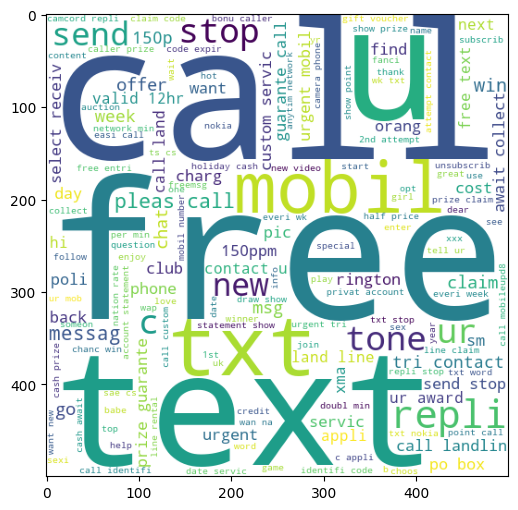

In [47]:
plt.figure(figsize = (15, 6))
plt.imshow(spam_wc)

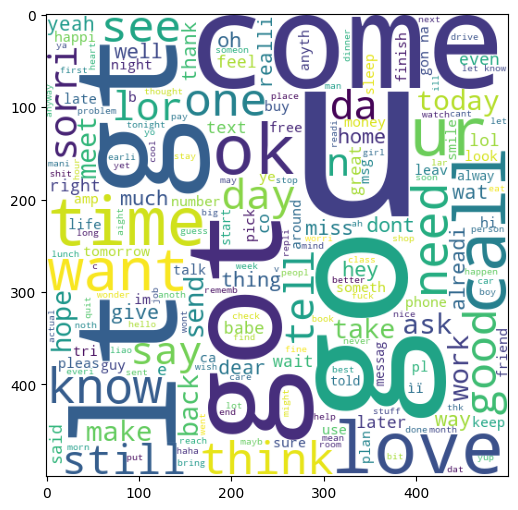

In [48]:
ham_wc = wc.generate(df[(df['target'] == 0)]['transformed_text'].str.cat(sep = " "))

plt.figure(figsize = (15, 6))
plt.imshow(ham_wc)

In [49]:
spam_corpus = []

for msg in df[(df['target'] == 1)]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

print(len(spam_corpus))

9939


In [50]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

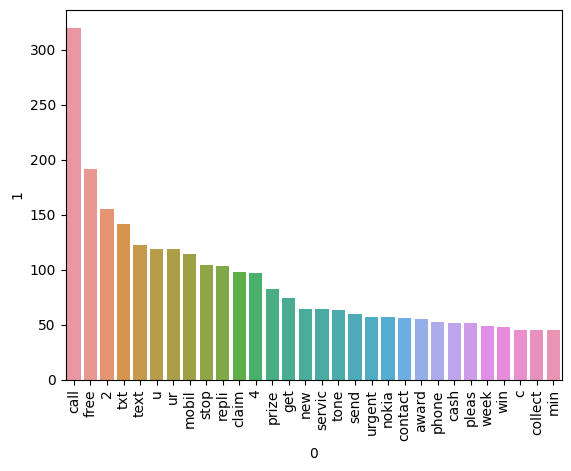

In [52]:
df2 = pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(x = df2[0], y = df2[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [53]:
ham_corpus = []

for msg in df[(df['target'] == 0)]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

print(len(ham_corpus))

35404


In [54]:
from collections import Counter
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

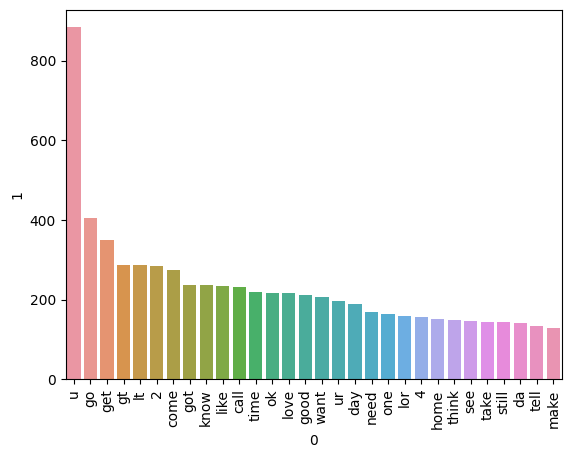

In [55]:
df3 = pd.DataFrame(Counter(ham_corpus).most_common(30))
sns.barplot(x = df3[0], y = df3[1])
plt.xticks(rotation = 'vertical')
plt.show()

# 4. Model Building

In [84]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [85]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [86]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [87]:
X.shape

(5169, 6708)

In [88]:
y = df['target'].values

In [89]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=2)

In [91]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [92]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [93]:
gnb.fit(X_train, y_train)
ypred_test_gnb = gnb.predict(X_test)
print(accuracy_score(y_test, ypred_test_gnb))
print(confusion_matrix(y_test, ypred_test_gnb))
print(precision_score(y_test, ypred_test_gnb))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [94]:
mnb.fit(X_train, y_train)
ypred_test_mnb = mnb.predict(X_test)
print(accuracy_score(y_test, ypred_test_mnb))
print(confusion_matrix(y_test, ypred_test_mnb))
print(precision_score(y_test, ypred_test_mnb))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [95]:
bnb.fit(X_train, y_train)
ypred_test_bnb = bnb.predict(X_test)
print(accuracy_score(y_test, ypred_test_bnb))
print(confusion_matrix(y_test, ypred_test_bnb))
print(precision_score(y_test, ypred_test_bnb))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [ ]:
# tfidf -> mnb

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [97]:
svc = SVC(kernel = 'sigmoid', gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
xgb = XGBClassifier(n_estimators = 50, random_state = 2)

In [98]:
clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}

In [99]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    ypred_test = clf.predict(X_test)
    accuracy = accuracy_score(y_test, ypred_test)
    precision = precision_score(y_test, ypred_test)
    return accuracy, precision

In [101]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9729206963249516, 0.9741379310344828)

In [102]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():

    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print("For", name)
    print("Accuracy", current_accuracy)
    print("Precision", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy 0.9729206963249516
Precision 0.9741379310344828
For KN
Accuracy 0.9003868471953579
Precision 1.0
For NB
Accuracy 0.9593810444874274
Precision 1.0
For DT
Accuracy 0.9352030947775629
Precision 0.8380952380952381
For LR
Accuracy 0.9516441005802708
Precision 0.94
For RF
Accuracy 0.971953578336557
Precision 1.0


C:\Users\ANANTH\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For AdaBoost
Accuracy 0.9613152804642167
Precision 0.9454545454545454


KeyboardInterrupt: 

In [ ]:
performance_df = pd.DataFrame({
    'Algorithm': clfs.keys(), 
    'Accuracy': accuracy_scores, 
    'Precision': precision_scores}).sort_values('Precision', ascending=False)
performance_df